In [75]:
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project/Stock-Price-Prediction-main

/content/drive/MyDrive/Project/Stock-Price-Prediction-main


## Read dataset

In [ ]:
path_default = "data/stock_data.csv"
stock_data = pd.read_csv(path_default)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y/%m/%d')
stock_data.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [ ]:
stock_code = stock_data['Stock'].unique()
print(stock_code)

['AAPL' 'TSLA' 'MSFT' 'FB']


In [ ]:
def get_stock(stock_data,stoc_code)

In [ ]:
stocks ={}
for i in stock_code:
  stocks[i]= pd.DataFrame()
  stocks[i] = stocks[i].append((stock_data[stock_data['Stock'] == i][["Date", "Close"]]), ignore_index=True)
  print(stocks[i].head(5),"\n",stocks[i].shape)


        Date    Close
0 1984-09-07  0.42388
1 1984-09-10  0.42134
2 1984-09-11  0.42902
3 1984-09-12  0.41618
4 1984-09-13  0.43927 
 (8364, 2)
        Date  Close
0 2010-06-28  17.00
1 2010-06-29  23.89
2 2010-06-30  23.83
3 2010-07-01  21.96
4 2010-07-02  19.20 
 (1858, 2)
        Date    Close
0 1986-03-13  0.07533
1 1986-03-14  0.07533
2 1986-03-17  0.07533
3 1986-03-18  0.07533
4 1986-03-19  0.07533 
 (7983, 2)
        Date  Close
0 2012-05-18  38.23
1 2012-05-21  34.03
2 2012-05-22  31.00
3 2012-05-23  32.00
4 2012-05-24  33.03 
 (1381, 2)


## Split training and test set

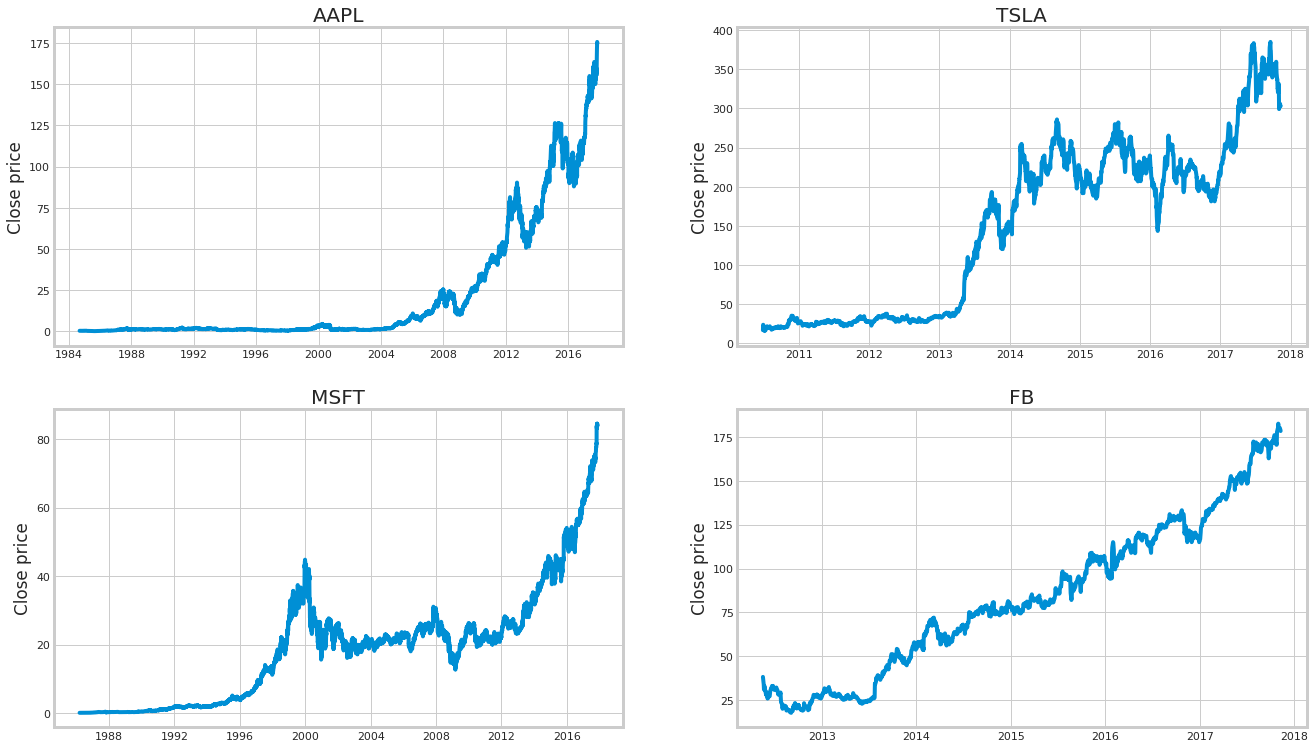

In [74]:
plt.figure(figsize=(20, 12))
for index, key in enumerate(stock_code):
  plt.subplot(2, 2, index + 1)
  plt.plot(stocks[key]["Date"], stocks[key]["Close"])
  plt.title(key)
  plt.ylabel('Close price')

In [ ]:
def SplitData(data, time_slice):
    index_mark = int(len(data) * 0.8)
    data = data['Close'].values
    close_train=data[0:index_mark]
    
    X_train = []
    Y_train = []
    for i in range(index_mark - time_slice):
        X_train.append(close_train[i:i+time_slice])
        Y_train.append(close_train[i+time_slice])
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_train = X_train.reshape((-1, 5, 1)) 
    Y_train = Y_train.reshape(-1, 1)

    close_test=data[index_mark:]
    X_test = []
    Y_test = []
    for i in range(len(close_test) - time_slice):
        X_test.append(close_test[i:i+time_slice])
        Y_test.append(close_test[i+time_slice])
    X_test, Y_test = np.array(X_test), np.array(Y_test)
    X_test = X_test.reshape((-1, 5, 1))
    Y_test = Y_test.reshape(-1, 1)

    return X_train, Y_train, X_test, Y_test

In [ ]:
# scaler = MinMaxScaler()
# scaled_train_data = scaler.fit_transform(real_train_df)

## Create model

In [79]:
def Model():
  model = tf.keras.models.Sequential(
      [
          tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
          tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
          tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
          tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
          tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
          tf.keras.layers.Dense(1, activation = tf.nn.leaky_relu)
      ]
  )
  return model

In [78]:
model = Model()

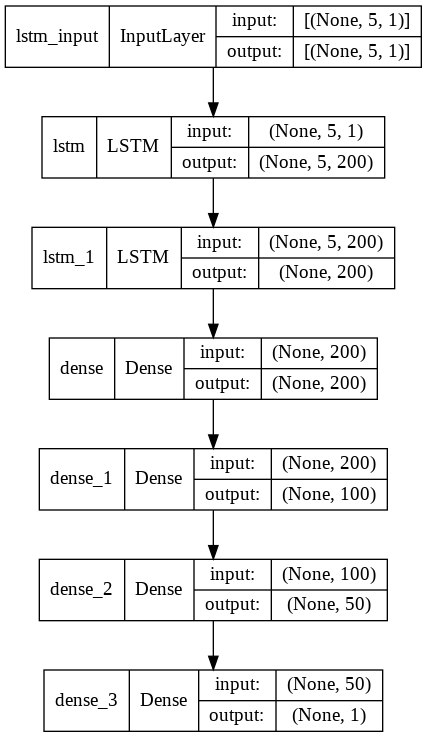

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 547,801
Trainable params: 547,801
Non-trai

## Custom Learning Rate

In [81]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

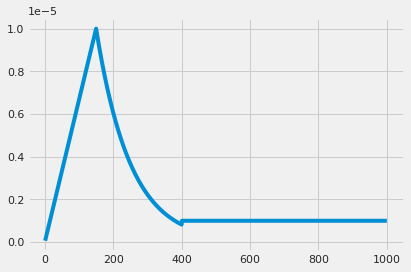

In [82]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)
plt.show()

In [83]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

## Train model

### Apple model

In [84]:
AAPL_X_train, AAPL_Y_train, AAPL_X_test, AAPL_Y_test = SplitData(stocks['AAPL'], 5)

In [85]:
AAPL_Y_train

array([[ 0.44566],
       [ 0.45718],
       [ 0.44052],
       ...,
       [42.346  ],
       [43.452  ],
       [43.696  ]])

In [86]:
AAPL_X_train

array([[[ 0.42388],
        [ 0.42134],
        [ 0.42902],
        [ 0.41618],
        [ 0.43927]],

       [[ 0.42134],
        [ 0.42902],
        [ 0.41618],
        [ 0.43927],
        [ 0.44566]],

       [[ 0.42902],
        [ 0.41618],
        [ 0.43927],
        [ 0.44566],
        [ 0.45718]],

       ...,

       [[45.078  ],
        [45.278  ],
        [44.235  ],
        [42.261  ],
        [42.854  ]],

       [[45.278  ],
        [44.235  ],
        [42.261  ],
        [42.854  ],
        [42.346  ]],

       [[44.235  ],
        [42.261  ],
        [42.854  ],
        [42.346  ],
        [43.452  ]]])

In [87]:
AAPL_Model = Model()

In [88]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [89]:
# Measuring the time taken by the model to train
start_time=time.time()
AAPL_hist = AAPL_Model.fit(AAPL_X_train, AAPL_Y_train, epochs = 400, batch_size=64, validation_data = (AAPL_X_test, AAPL_Y_test), callbacks=[callback])
end_time=time.time()
print("## Total Time Taken: {:.2f} Minutes ##".format((end_time-start_time)/60))

Epoch 1/400
105/105 [==============================] - 10s 49ms/step - loss: 101.0479 - root_mean_squared_error: 10.0523 - val_loss: 9105.8486 - val_root_mean_squared_error: 95.4246 - lr: 0.0000e+00
Epoch 2/400
105/105 [==============================] - 5s 44ms/step - loss: 101.0257 - root_mean_squared_error: 10.0512 - val_loss: 9102.2236 - val_root_mean_squared_error: 95.4056 - lr: 6.6667e-08
Epoch 3/400
105/105 [==============================] - 5s 46ms/step - loss: 100.9586 - root_mean_squared_error: 10.0478 - val_loss: 9095.1230 - val_root_mean_squared_error: 95.3684 - lr: 1.3333e-07
Epoch 4/400
105/105 [==============================] - 5s 45ms/step - loss: 100.8438 - root_mean_squared_error: 10.0421 - val_loss: 9084.1172 - val_root_mean_squared_error: 95.3106 - lr: 2.0000e-07
Epoch 5/400
105/105 [==============================] - 6s 54ms/step - loss: 100.6768 - root_mean_squared_error: 10.0338 - val_loss: 9068.8135 - val_root_mean_squared_error: 95.2303 - lr: 2.6667e-07
Epoch 6/4

In [ ]:
AAPL_Model.save('./model/AAPL/AAPL_LSTM.h5')

In [90]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

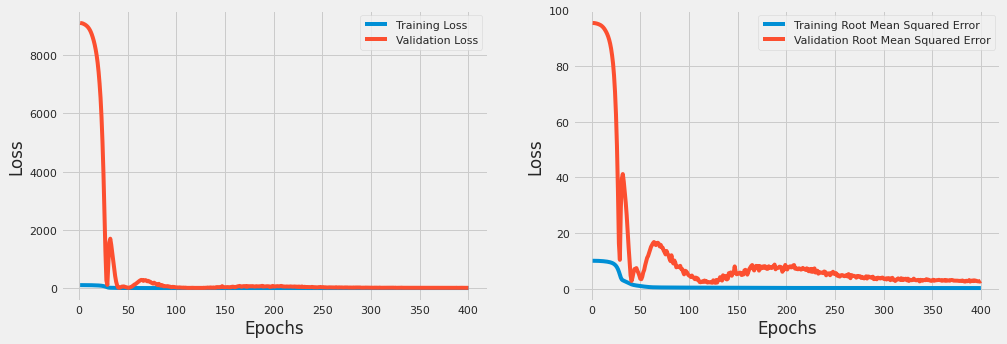

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [93]:
### Predicting the closing stock price
AAPL_prediction = AAPL_Model.predict(AAPL_X_test)

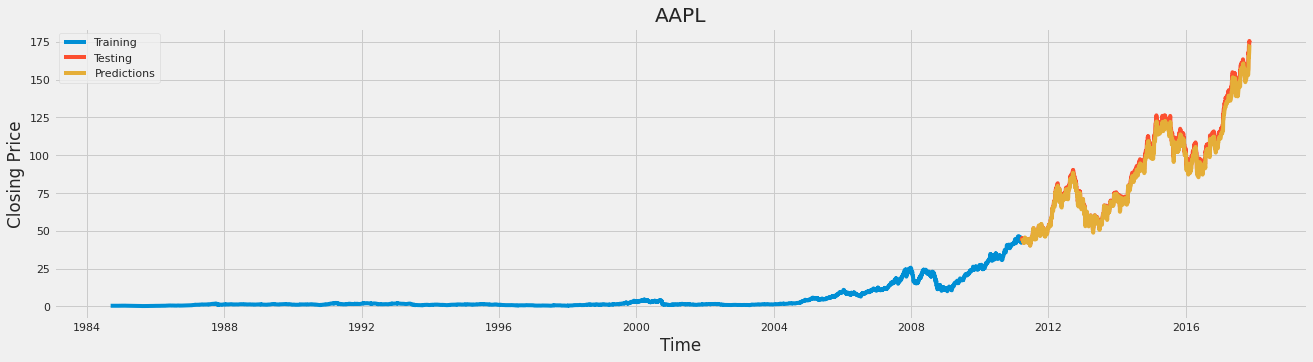

In [94]:
plt.figure(figsize=(20, 5))
i_AAPL_mark = int(len(stocks['AAPL']) * 0.8)
plt.title("AAPL")
plt.plot(stocks['AAPL']['Date'][:i_AAPL_mark], 
        stocks['AAPL']['Close'][:i_AAPL_mark], label = 'Training')

plt.plot(stocks['AAPL']['Date'][i_AAPL_mark:], 
        stocks['AAPL']['Close'][i_AAPL_mark:], label = 'Testing')

plt.plot(stocks['AAPL']['Date'][i_AAPL_mark+5:], 
        AAPL_prediction, label = 'Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

In [96]:
rmse = math.sqrt(mean_squared_error(AAPL_Y_test, AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Y_test)/np.abs(AAPL_Y_test))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 2.8009029419814633
MAPE: 0.023875137432057426


In [ ]:
evaluate = pd.DataFrame({'AAPL': [rmse,mape]},index=["RMSE", "MAPE"])
evaluate

,AAPL
RMSE,7.658401
MAPE,0.054227
